# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [43]:
data = pd.read_csv('weight-height.csv')

male_df =  data[data['Gender']=='Male']
female_df =  data[data['Gender']=='Female']


describe_data(male_df, 'Male')
describe_data(female_df, 'Female')
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height mean: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight mean: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height mean: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight mean: 19.022467805319028


In [41]:
female_df['Gender'].value_counts()

pandas.core.series.Series

In [28]:

female_df.Height.std()

2.696284015765054

In [42]:
def describe_data(data, gender):
    # gender = data['Gender'][0]
    cols = list(data.columns)
    for measure in cols[1:]:
        print(f'{gender} {measure} mean: {data[measure].mean()}')
        print(f'{gender} {measure} mean: {data[measure].std()}')

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

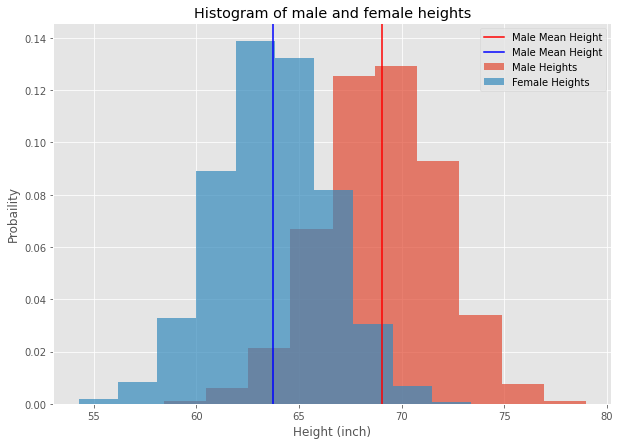

In [61]:
# Your code here
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Histogram of male and female heights', xlabel='Height (inch)', ylabel='Probaility')
ax.hist(male_df['Height'], bins=10, alpha=0.7, label='Male Heights', density=True)
ax.axvline(male_df['Height'].mean(), color='red', label='Male Mean Height')
ax.hist(female_df['Height'], bins=10, alpha=0.7, label='Female Heights', density=True)
ax.axvline(female_df['Height'].mean(), color='blue', label='Male Mean Height')
ax.legend()


In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

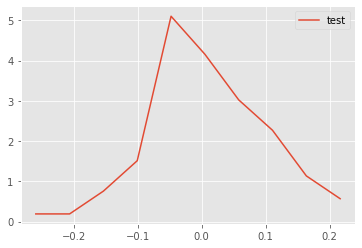

In [73]:
def density(x):
    n, bins = np.histogram(x, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for ii in range(n.size):
        pdfx[ii] = (bins[ii]+bins[ii+1]) / 2
        pdfy[ii] = n[ii]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

In [74]:
# np.random.seed(5)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 100)

# n, bins = np.histogram(s)
# plt.plot(bins[:-1], n)
# n,bins
# # x,y = density(s)
# # plt.plot(x,y, label = 'test')
# # plt.legend()

## Add overlapping density plots to the histograms plotted earlier

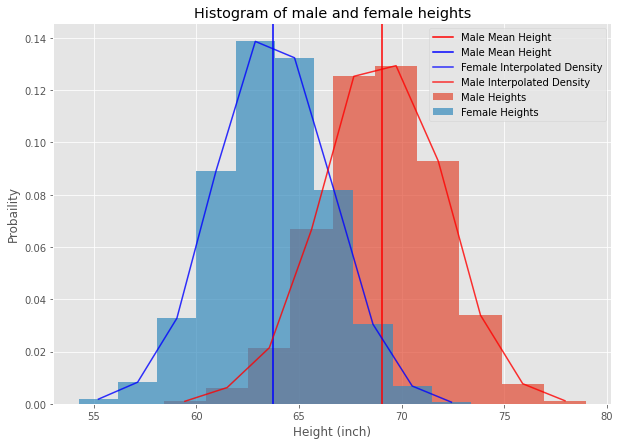

In [76]:
# Your code here
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Histogram of male and female heights', xlabel='Height (inch)', ylabel='Probaility')
ax.hist(male_df['Height'], bins=10, alpha=0.7, label='Male Heights', density=True)
ax.axvline(male_df['Height'].mean(), color='red', label='Male Mean Height')
ax.hist(female_df['Height'], bins=10, alpha=0.7, label='Female Heights', density=True)
ax.axvline(female_df['Height'].mean(), color='blue', label='Male Mean Height')

fx, fy = density(female_df['Height'])
mx, my =density(male_df['Height'])

ax.plot(fx, fy, label='Female Interpolated Density', color='blue', alpha=0.8)
ax.plot(mx, my, label='Male Interpolated Density', color='red', alpha=0.8)
ax.legend()


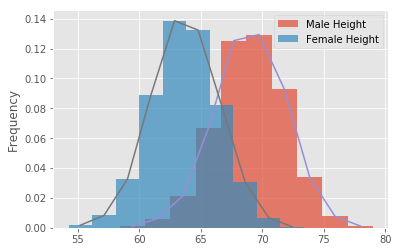

In [20]:
# Your code here 

## Repeat the above exercise for male and female weights

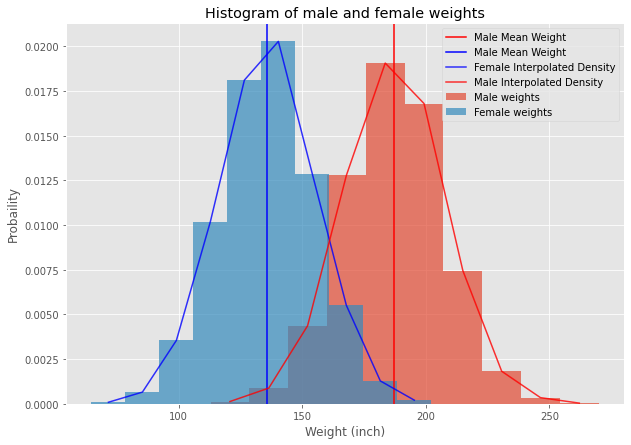

In [77]:
# Your code here 
# Your code here
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Histogram of male and female weights', xlabel='Weight (inch)', ylabel='Probaility')
ax.hist(male_df['Weight'], bins=10, alpha=0.7, label='Male weights', density=True)
ax.axvline(male_df['Weight'].mean(), color='red', label='Male Mean Weight')
ax.hist(female_df['Weight'], bins=10, alpha=0.7, label='Female weights', density=True)
ax.axvline(female_df['Weight'].mean(), color='blue', label='Male Mean Weight')

fx, fy = density(female_df['Weight'])
mx, my =density(male_df['Weight'])

ax.plot(fx, fy, label='Female Interpolated Density', color='blue', alpha=0.8)
ax.plot(mx, my, label='Male Interpolated Density', color='red', alpha=0.8)
ax.legend()


## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

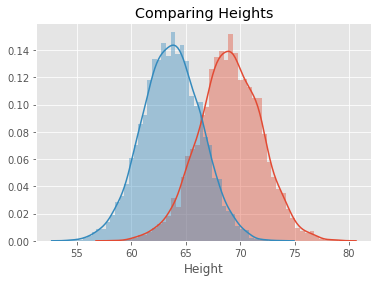

In [23]:
# Code for heights here

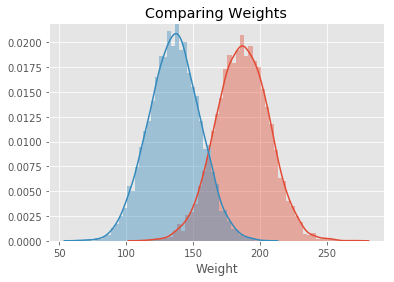

In [24]:
# Code for weights here

[Text(0.5, 1.0, 'Comparing Heights')]

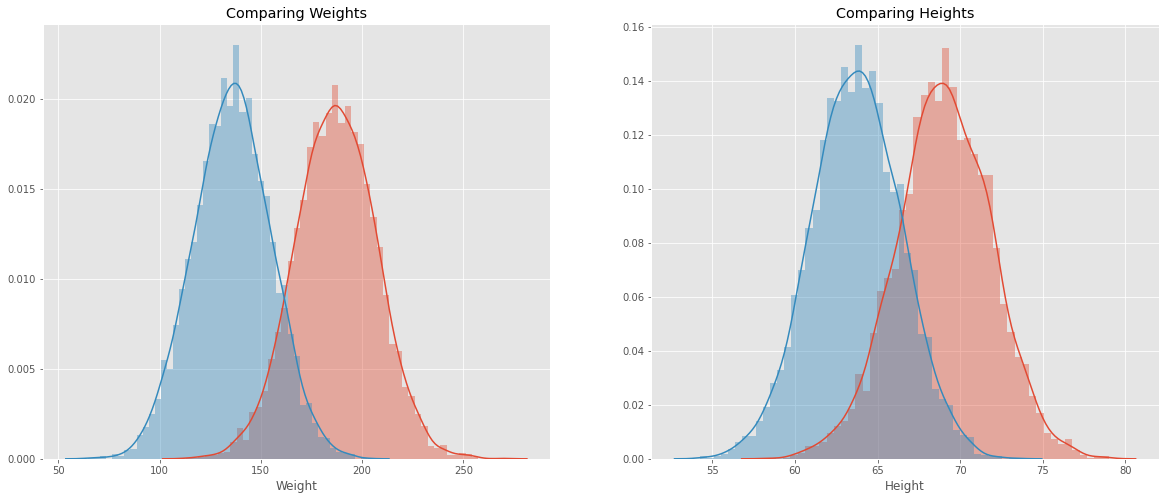

In [92]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.distplot(male_df['Weight'], ax=ax1)
sns.distplot(female_df['Weight'], ax=ax1)
ax1.set(title='Comparing Weights')
sns.distplot(male_df['Height'], ax=ax2)
sns.distplot(female_df['Height'], ax=ax2)
ax2.set(title='Comparing Heights')

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.